## Purpose

Plot the data through time for each trial, showing the muscle activation we detected in EMG processing with a vertical red line. 

Create panels of STAs for each data type and each trial. 

Layer all STAs for a given data type one atop the other, illustrating the problem with averaging across all trials without considering latent variables. 

Create a data summary dataframe across data types. Summarize datatypes across all trials. 



In [1]:
import numpy as np
import pandas
import glob
import scipy.io

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')




In [2]:
acceptable_trials = ['m07_t01_15', 'm07_t03_15', 'm07_t06_15','m10_t02_16','m11_t02_16','m11_t04_16',
                   'm12_t02_16', 'm14_t03_16','m14_t05_16', 'm15_t01_16', 'm15_t03_16']

# Goal 1
Give an over view of the data using plotting.

Cell 1: Time course of data showing detected muscle activation with a red vertical line.

Cell 2: Spike Triggered Averages from individual trials plotted in 3x4 panels. 

Cell 3: All STA's for a given data type overlayed in different colors to illustrate blunting of excursion that results from averaging across trials. 

m07_t01_15


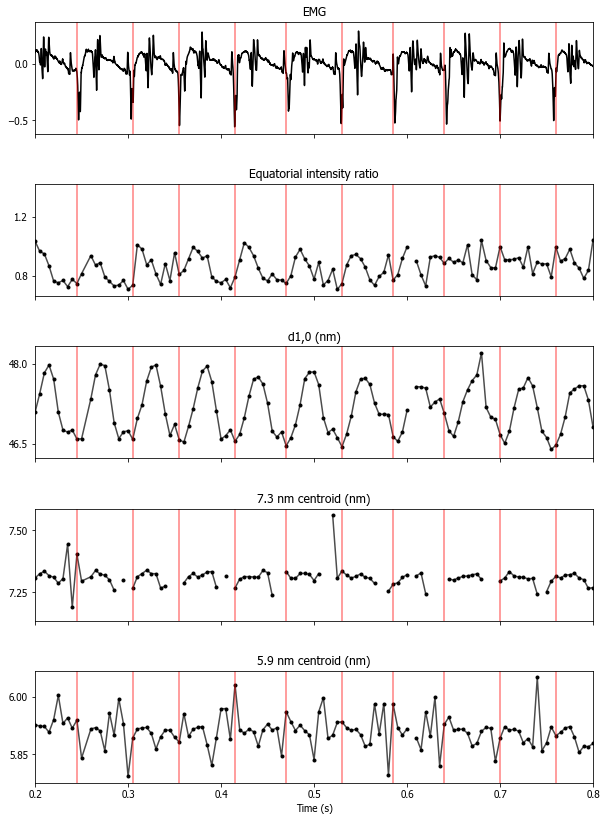

m07_t03_15


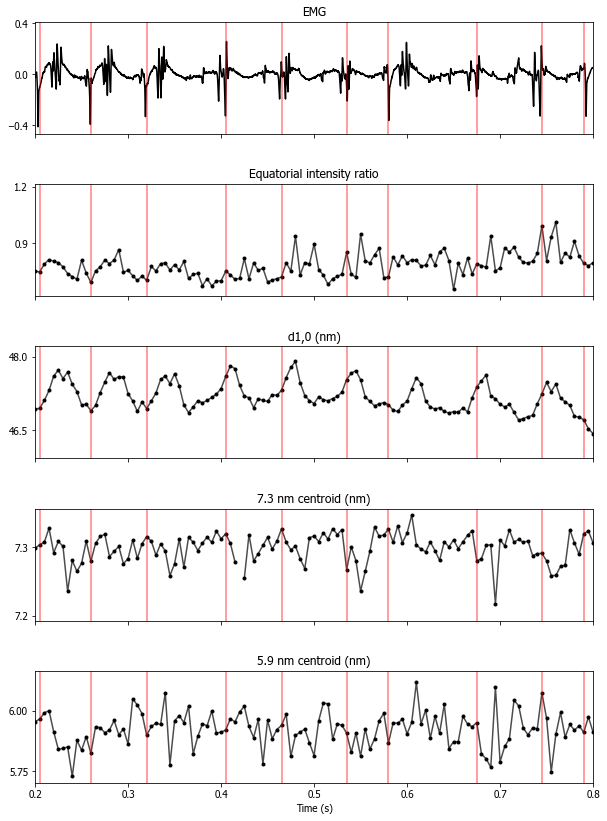

m07_t06_15


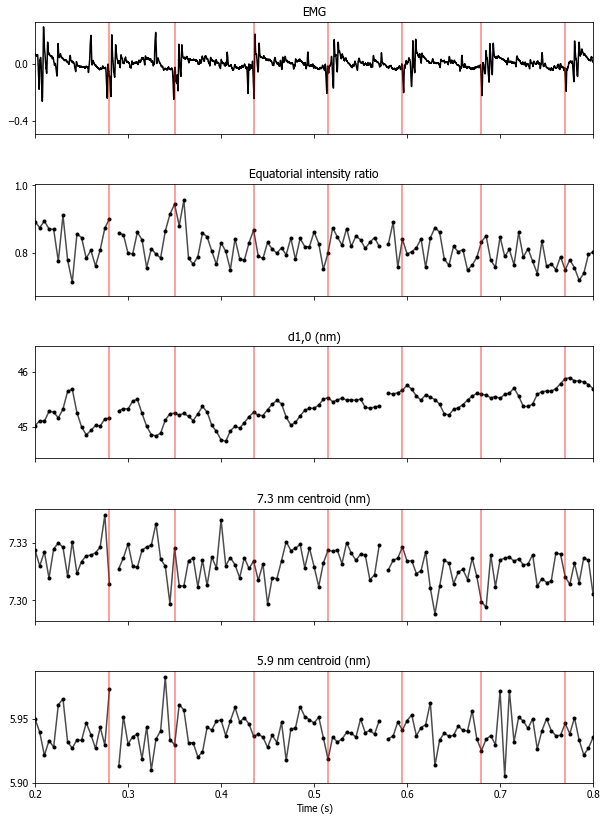

m10_t02_16


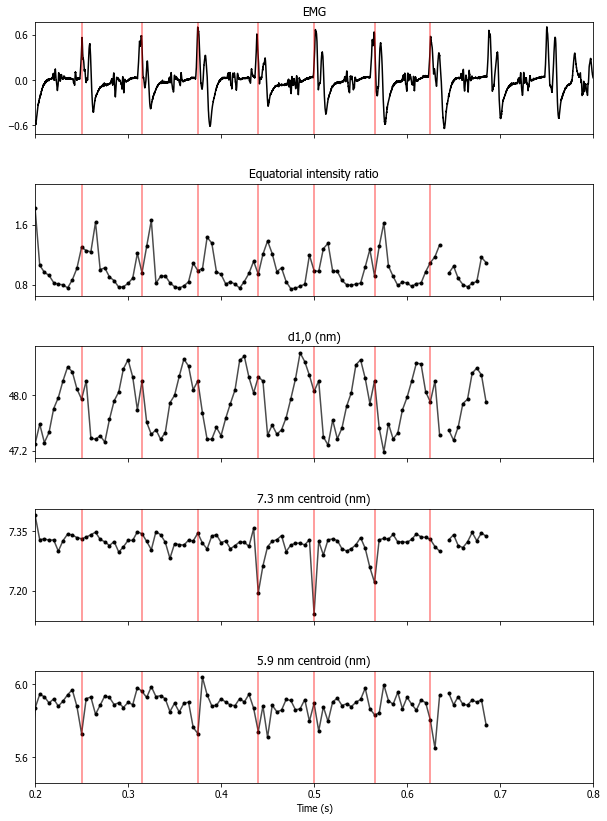

m11_t02_16


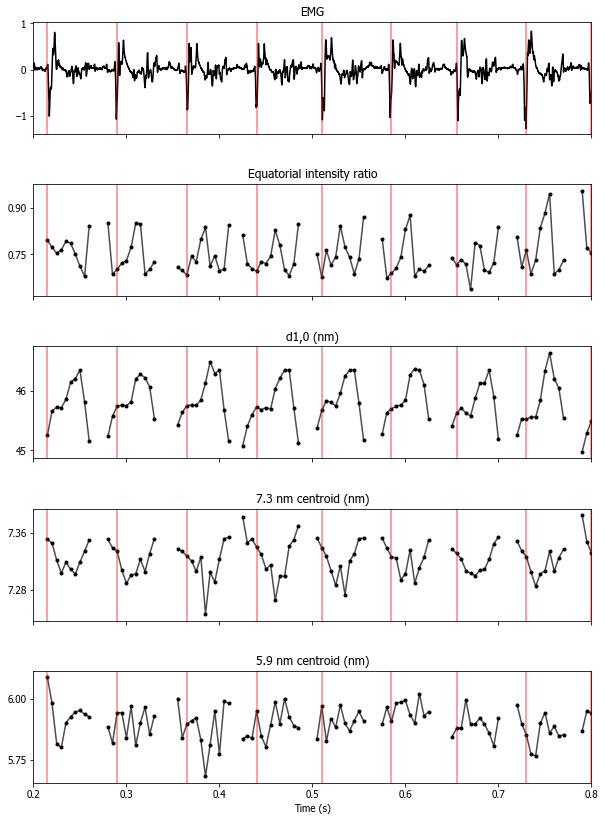

m11_t04_16


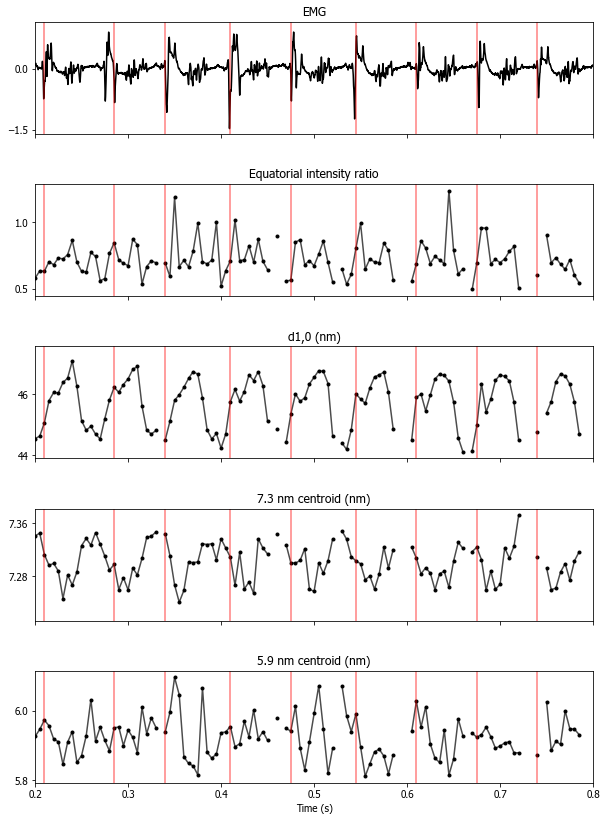

m12_t02_16


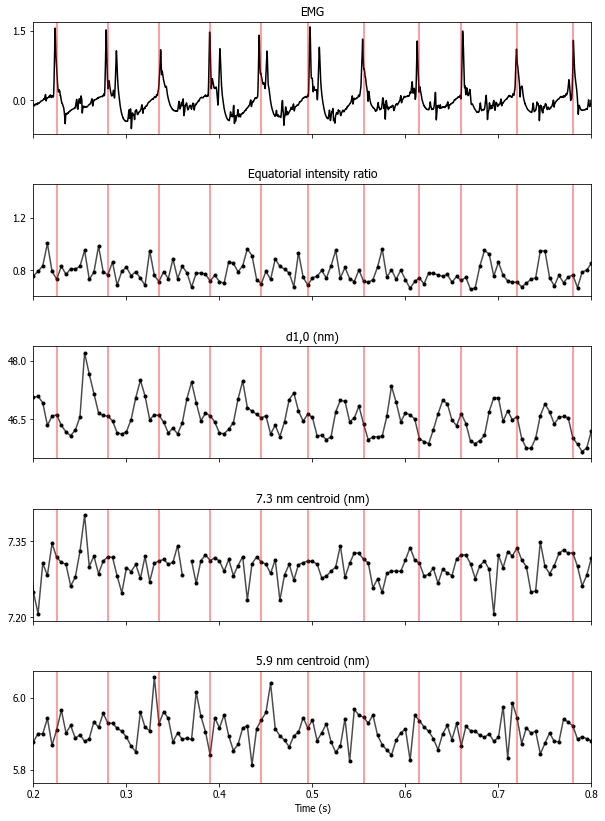

m14_t03_16


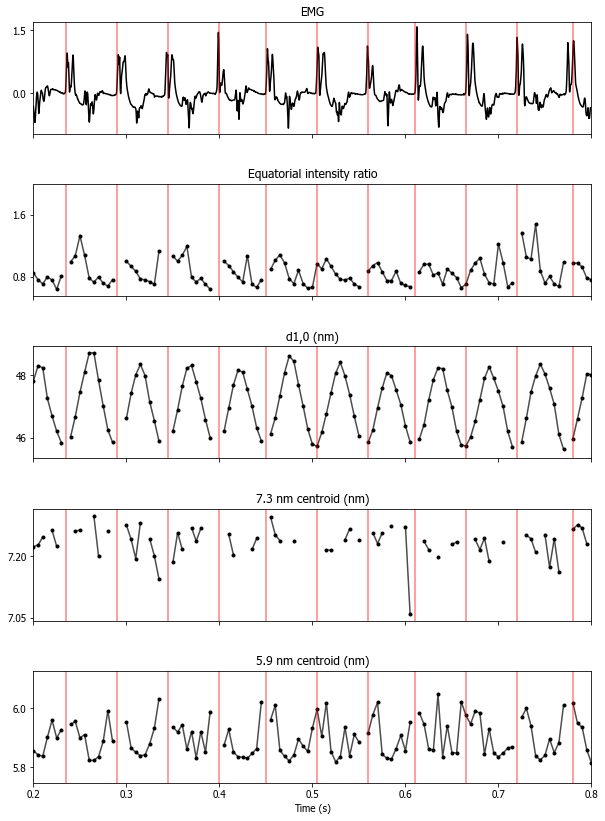

m14_t05_16


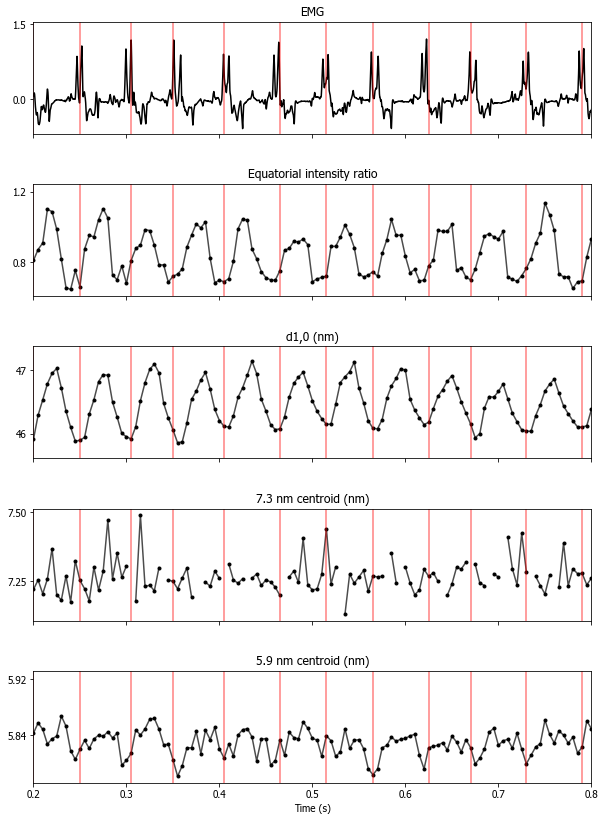

m15_t01_16


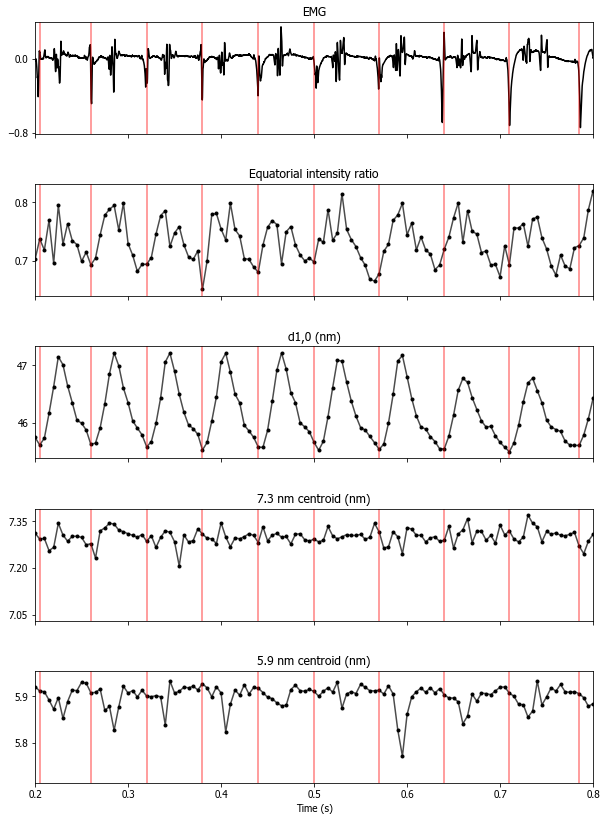

m15_t03_16


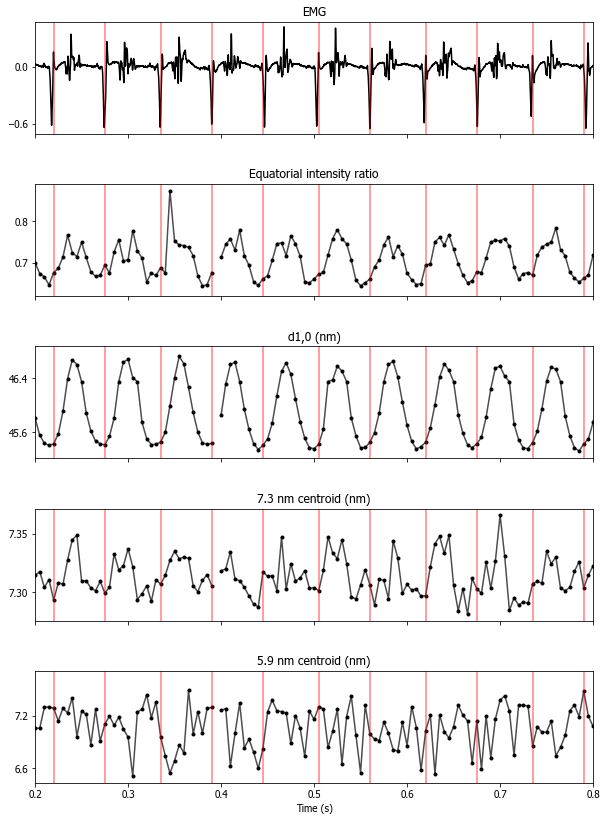

In [9]:
# Plotting the time course of lattice kinematic and EMG data, showing detected muscle activation with a red vertical line.

x_min = .2
x_max = .8
DAQ_hertz = 25000
for trial in acceptable_trials:
    print(trial)
    
    # Load in EMG data
    EMG_file = '/Users/sagemalingen/Desktop/A17/Process/' + trial + '_EMG.csv'
    EMG = pandas.read_csv(EMG_file)
    
    # Load in x-ray diffraction data 
    detector_file = '/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv'
    detector = pandas.read_csv(detector_file)

    peak_times = detector.seconds.where(detector.peaks > .5).dropna(how = 'all')

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharey=False, sharex = True)
    fig.set_size_inches(10, 14)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)
    ax1.plot(EMG.seconds, EMG.EMG_amplitude, c = 'black')
    for pt in peak_times:
        ax1.axvline(x=pt, c = 'red', alpha = .5)
    ax1.set_title('EMG')
    ax1.set_xlim(x_min,x_max)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(2))
        
    ax2.plot(detector.seconds, detector.I20_I10, c = 'black', alpha = alpha)
    ax2.scatter(detector.seconds, detector.I20_I10, c = 'black', marker = '.')
    for pt in peak_times:
        ax2.axvline(x=pt, c = 'red', alpha = .5)
    ax2.set_title('Equatorial intensity ratio')
    ax2.set_xlim(x_min,x_max)
    ax2.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    ax3.plot(detector.seconds, detector.D10, c = 'black', alpha = alpha)
    ax3.scatter(detector.seconds, detector.D10, c = 'black', marker = '.')
    for pt in peak_times:
        ax3.axvline(x=pt, c = 'red', alpha = .5)
    ax3.set_title('d1,0 (nm)')
    ax3.set_xlim(x_min,x_max)
    ax3.yaxis.set_major_locator(plt.MaxNLocator(2))

    ax4.plot(detector.seconds, detector.M6_c, c = 'black', alpha = alpha)
    ax4.scatter(detector.seconds, detector.M6_c, c = 'black', marker = '.')
    for pt in peak_times:
        ax4.axvline(x=pt, c = 'red', alpha = .5)
    ax4.set_title('7.3 nm centroid (nm)')

    ax4.set_xlim(x_min,x_max)
    ax4.yaxis.set_major_locator(plt.MaxNLocator(2))

    ax5.plot(detector.seconds, detector.A59_c, c = 'black', alpha = alpha)
    ax5.scatter(detector.seconds, detector.A59_c, c = 'black', marker = '.')
    for pt in peak_times:
        ax5.axvline(x=pt, c = 'red', alpha = .5)
    ax5.set_title('5.9 nm centroid (nm)')
    ax5.set_xlim(x_min,x_max)
    ax5.set_xlabel('Time (s)')
    ax5.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    plt.show()
    

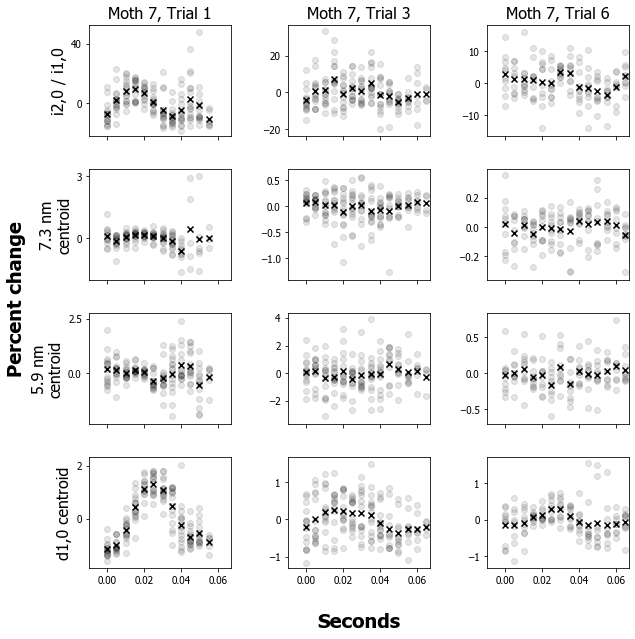

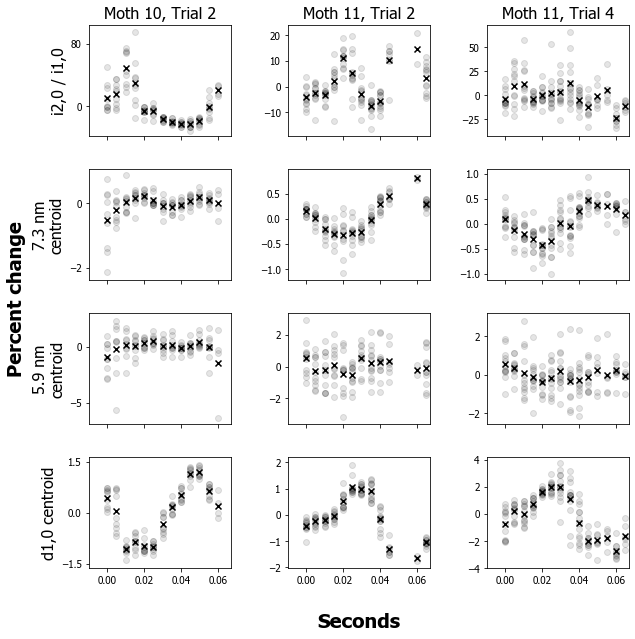

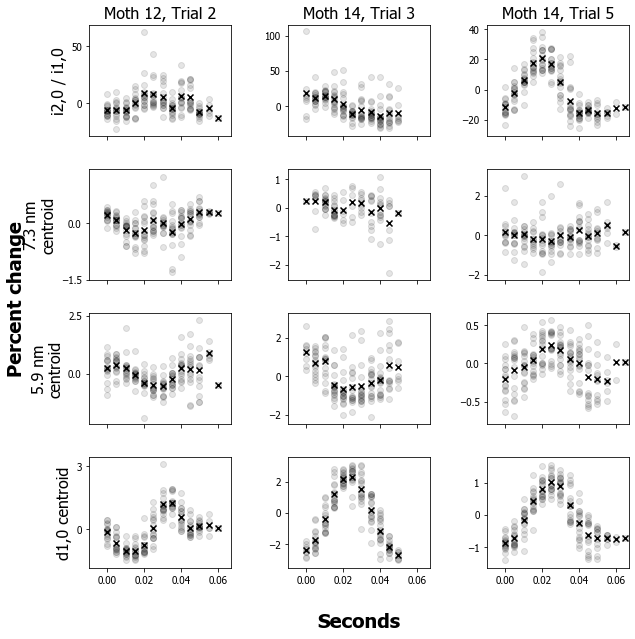

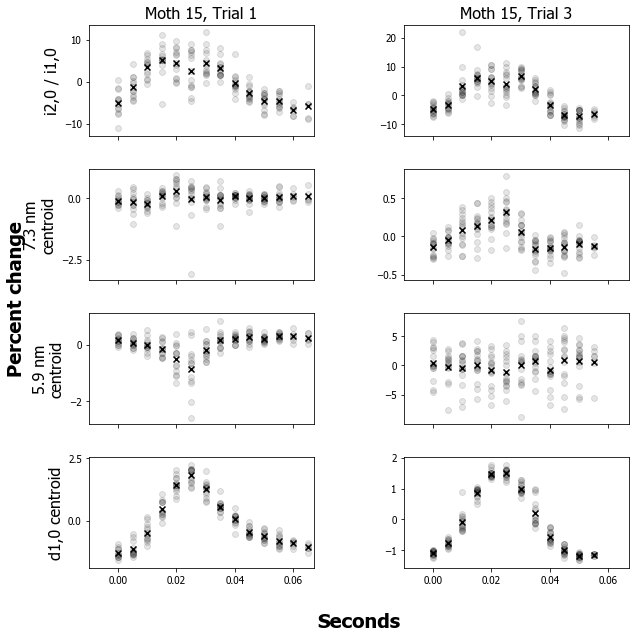

In [4]:
# Plotting STAs for each data type, each trial, in 3 col (moths), 4 row (data types) panel

# Batch acceptable trials into sets
sets = [['m07_t01_15', 'm07_t03_15', 'm07_t06_15'], ['m10_t02_16','m11_t02_16','m11_t04_16'],['m12_t02_16', 'm14_t03_16','m14_t05_16'], ['m15_t01_16', 'm15_t03_16']]

# Dictionary to give more intuitive printed titles
plot_titles = {'m07_t01_15':'Moth 7, Trial 1', 'm07_t03_15':'Moth 7, Trial 3', 'm07_t06_15':'Moth 7, Trial 6', 'm10_t02_16':'Moth 10, Trial 2',
         'm11_t02_16':'Moth 11, Trial 2', 'm11_t04_16':'Moth 11, Trial 4', 'm12_t02_16':'Moth 12, Trial 2', 'm14_t03_16':'Moth 14, Trial 3',
         'm14_t05_16':'Moth 14, Trial 5', 'm15_t01_16':'Moth 15, Trial 1', 'm15_t03_16':'Moth 15, Trial 3'}


set_ind = 0
for s in sets:
    f, axarr = plt.subplots(4, len(s), sharex = 'col', sharey = 'none', figsize = (10,10))
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)

    f.subplots_adjust(hspace=0.3)
    f.subplots_adjust(wspace=0.4)
    f.subplots_adjust(.15)

    columns = ['I20_I10', 'M6_c', 'A59_c', 'D10']
    
    # Dictionary to give more intuitive printed titles
    titles = {'M6_c':'thick filament stretch', 'D10':'lattice spacing', 'A59_c':'thin filament stretch', 'M3_c':'crown repeat', 'I20_I10':
              'I20_I10', 'I11I20_I10':'I20I11_I10'}
    
    dict_means = {'M6_c':np.array([]), 'D10':np.array([]), 'A59_c':np.array([]), 'M3_c':np.array([]), 'I20_I10':np.array([]), 'I20I11_I10':np.array([])}

    # Looping over columns
    col_ind = -1
    for column in columns:
        col_ind += 1
        stuff_index = []
        stuff_space = []
        count = -1
        trial_ind = 0
        for trial in s:
            count += 1
            d = pandas.read_csv('/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv') 
            for i in np.arange(0, d.ISI.max()): 
                temp = d.where(d.ISI == i).dropna(how = 'all').reset_index()
                axarr[col_ind, trial_ind].scatter(temp.index/200, (temp[column]/temp[column].mean() - 1)*100, c = 'black', alpha = .1)
                stuff_index.append(temp.index/200)
                stuff_space.append(temp[column]/temp[column].mean())

            stuff_index = np.concatenate(np.array(stuff_index))
            stuff_space = np.concatenate(np.array(stuff_space))

            stuff = pandas.DataFrame({'time':stuff_index, 'data':stuff_space})
            stuff_index = []
            stuff_space = []

            means = []
            SDs = []
            times = []
            for i in np.arange(0, stuff.time.max() + 1, 1/200):
                temp = stuff.where(stuff.time == i).dropna(how = 'all')
                means.append(temp.data.mean())
                SDs.append((100*(temp.data/temp.data.mean() - 1)).std())
                times.append(i)

            dict_means[column] = means
            axarr[col_ind, trial_ind].scatter(times, (np.array(means) - 1)*100, c = 'black', marker = 'x')
            axarr[col_ind, trial_ind].set_xlim([-0.01,.067])
            trial_ind += 1
            
    if len(s) == 3:
        axarr[0, 0].set_title(plot_titles[s[0]], fontsize = '16')
        axarr[0, 1].set_title(plot_titles[s[1]], fontsize = '16')
        axarr[0, 2].set_title(plot_titles[s[2]], fontsize = '16')

        axarr[0,0].set_ylabel('i2,0 / i1,0', fontsize = '16')
        axarr[0,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[1,0].set_ylabel('7.3 nm\ncentroid', fontsize = '16')
        axarr[1,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[2,0].set_ylabel('5.9 nm\ncentroid', fontsize = '16')
        axarr[2,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[3,0].set_ylabel('d1,0 centroid', fontsize = '16')
        axarr[3,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        
    elif len(s) == 2:
        axarr[0, 0].set_title(plot_titles[s[0]], fontsize = '16')
        axarr[0, 1].set_title(plot_titles[s[1]], fontsize = '16')

        axarr[0,0].set_ylabel('i2,0 / i1,0', fontsize = '16')
        axarr[0,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[1,0].set_ylabel('7.3 nm\ncentroid', fontsize = '16')
        axarr[1,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[2,0].set_ylabel('5.9 nm\ncentroid', fontsize = '16')
        axarr[2,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        axarr[3,0].set_ylabel('d1,0 centroid', fontsize = '16')
        axarr[3,0].yaxis.set_major_locator(plt.MaxNLocator(2))
        
        
    f.text( .05, 0.5, "Percent change", rotation='vertical',
    horizontalalignment='center', verticalalignment='center', fontsize = '20', weight = 'bold')
    
    f.text( .525, 0.05, "Seconds", rotation='horizontal',
    horizontalalignment='center', verticalalignment='center', fontsize = '20', weight = 'bold')
  
    #plt.savefig('/Users/sagemalingen/Desktop/Multi_trial_STAs_set_' + str(set_ind) + '.png', dpi = 400)
    
    set_ind += 1
    

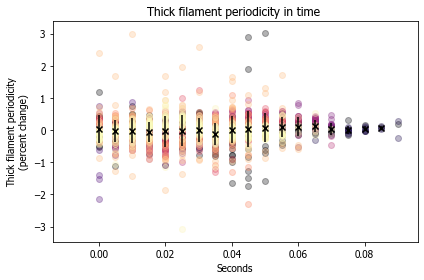

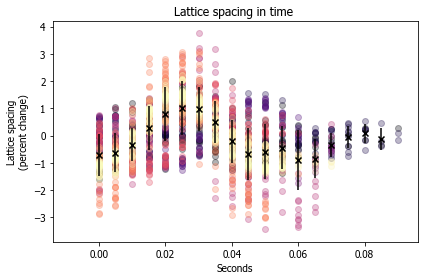

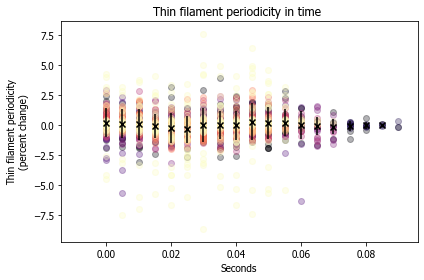

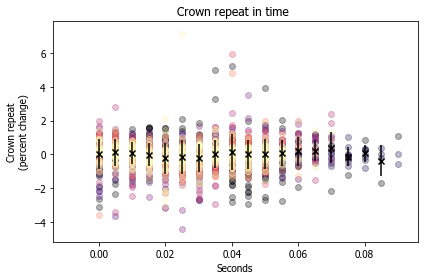

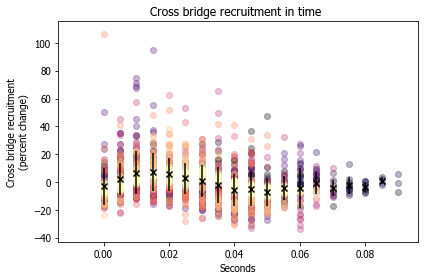

In [3]:
# Plot the STAs for a given column and all trials layered one atop the other 

columns = ['M6_c', 'D10', 'A59_c', 'M3_c', 'I20_I10']
titles = {'M6_c':'Thick filament periodicity', 'D10':'Lattice spacing', 'A59_c':'Thin filament periodicity', 'M3_c':'Crown repeat', 'I20_I10':
          'Cross bridge recruitment', 'I20I11_I10':'I20I11_I10'}
dict_means = {'M6_c':np.array([]), 'D10':np.array([]), 'A59_c':np.array([]), 'M3_c':np.array([]), 'I20_I10':np.array([]), 'I20I11_I10':np.array([])}

# Creating color list; one color per trial
colormap = plt.cm.magma
colors = [colormap(i) for i in np.linspace(-.1, 1.1, len(acceptable_trials))]

for column in columns:
    stuff_index = []
    stuff_space = []
    count = -1
    for trial in acceptable_trials:
        count += 1
        color = colors[count]
        d = pandas.read_csv('/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv') 
        for i in d.ISI.drop_duplicates():
            temp = d.where(d.ISI == i).dropna(how = 'all').reset_index()
            plt.scatter(temp.index/200, 100*(temp[column]/temp[column].mean() - 1), c = color, alpha = .3) 
            stuff_index.append(temp.index/200)
            stuff_space.append(100*(temp[column]/temp[column].mean() - 1)) # Perecent

        plt.ylabel(titles[column] + '\n(percent change)')
        plt.xlabel('Seconds')
        plt.title(titles[column] + ' in time ')


    stuff_index = np.concatenate(np.array(stuff_index))
    stuff_space = np.concatenate(np.array(stuff_space))

    stuff = pandas.DataFrame({'time':stuff_index, 'data':stuff_space})
    stuff_index = []
    stuff_space = []

    means = []
    SDs = []
    times = []
    for i in np.arange(0, stuff.time.max(), 1/200):
        temp = stuff.where(stuff.time == i).dropna(how = 'all')
        means.append(temp.data.mean())
        SDs.append((temp.data).std())
        times.append(i)

    dict_means[column] = means
    plt.scatter(times, means, c = 'black', marker = 'x')
    plt.errorbar(times, means, SDs, linestyle = 'none', c = 'black')
    plt.tight_layout()
    plt.show()
    
    


### End of the code blocks for plotting functionality

# Create a summary data frame across all trials
To be factored into the summary data frame, a time series of data (for instance, the 7.3 nm centroid movement for a given trial) was first tested to see if it had a significant peridic component at wing beat frequency using a permutation bootstrap. 
The permutation bootstrap test is run in the script "Perm_Bootstrap.ipynb"

In [4]:
# Create an dataframe with a column of the trials. To this dataframe I'll add the mean, excursion and time of peak for each trial

trials = []
for trial in acceptable_trials:
    file = '/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv'
    t = file.split('/')[-1]
    t = t.split('.')[0]
    t = t.split('_')[0] + '_' + t.split('_')[1] + '_' + t.split('_')[2]
    trials.append(t)

summary = pandas.DataFrame({'Trial' : trials})    

In [6]:
# Load in the permutation bootstrap data. 
perm_bootstrap = pandas.read_csv('/Users/sagemalingen/Desktop/A17/Perm_bootstrap.csv')
perm_bootstrap

,Unnamed: 0,Trial,D10,M6_c,M3_c,A51_c,A59_c,I20_I10
0,0,m07_t01_15,0.0,3.6,0.0,25.7,63.5,0.0
1,1,m07_t03_15,0.0,0.2,47.9,40.2,87.0,11.2
2,2,m07_t06_15,6.6,2.6,55.7,7.2,0.0,2.1
3,3,m10_t02_16,0.0,15.6,1.0,0.9,22.8,0.0
4,4,m11_t02_16,0.0,0.0,0.0,20.5,1.4,96.9
5,5,m11_t04_16,0.0,0.0,0.1,2.8,37.8,0.0
6,6,m12_t02_16,0.0,0.0,3.7,1.8,0.0,0.6
7,7,m14_t03_16,0.0,16.5,0.0,50.0,0.0,0.0
8,8,m14_t05_16,0.0,92.7,67.2,2.8,0.0,0.0
9,9,m15_t01_16,0.0,70.0,27.7,17.8,0.0,0.0


In [13]:
# Prescribe the full size of summary and all of the columns names

column_names = ['M6_c', 'M3_c', 'D10', 'A59_c', 'A51_c', 'I20_I10'] #'I20I11_I10',
suffixes = ['_mean', '_peak_time', '_excursion_abs', '_excursion_prop'] # _abs is nanometer values, prop is proportion of the mean

a = np.full((len(summary)), np.nan)
for column_name in column_names:
    name = column_name + '_peak_time'
    summary[name] = a
    for suffix in suffixes:
        name = column_name + suffix
        summary[name] = a

In [10]:
# Calculate the average number of wingbeats for all trials

num_peaks = []
for trial in acceptable_trials:
    file = '/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv'
    d = pandas.read_csv(file)
    num_peaks.append(sum(d.peaks))
np.mean(np.array(num_peaks))

14.727272727272727

In [15]:
# In this block I create a temporary dataframe for each trial, each column where the rows are the isi and progression along columns is progression in time.
# Then using this dataframe, I compute an STA for each trial, each column.
# This is appended to a list of STAs. These lists are used to make a new dataframe, which then is used to create the summary dataframe, and also average time traces. 

means = []
issues = []
ind = 0

M6_STAs = []
M3_STAs = []
I20_I10_STAs = []
A59_STAs = []
S10_STAs = []

for trial in acceptable_trials:
    print(trial)
    file = '/Users/sagemalingen/Desktop/A17/Process/' + trial + '_det.csv'
    d = pandas.read_csv(file) 
    
    for column_name in column_names:
        
        # First access how large the permutation bootstrap is; we want all values for this column to be nans if the bootstrap was over 5%;
        # it's in a try block in case; historically this handled the case where a column name was used that was not included in permutation bootstrap
        try:
            bootstrap_indicator = int(perm_bootstrap.where(perm_bootstrap.Trial == trial).dropna(how = 'all')[column_name])
            
            if bootstrap_indicator < 5:

                average = d[column_name].mean()

                list_ISIs = []    # Each ISI will be appended to this list
                len_ISIs = []     # A list of the length of ISIs so that the maximum length can be determined. 
                                  # This will determine how many columns are in the df.

                for i in np.arange(0,d.ISI.max()):
                    temp = d.where(d.ISI == i).dropna(how = 'all').reset_index() # I don't want to drop where there is a single nan, causing a frame shift, 
                                                                                 # but only where all vals are nans due to using the where function. Therefore the option "all" is used.
                    list_ISIs.append(np.array(temp[column_name]))
                    len_ISIs.append(len(temp))

                length = np.max(len_ISIs)

                col_titles = []
                for i in np.arange(0,length):
                    col_titles.append(str(i))

                ISIs_in_rows = pandas.DataFrame(list_ISIs, columns = col_titles) # Puts nans on the end of ISIs shorter than the longest

                summary[column_name + '_mean'].iloc[ind] = ISIs_in_rows.mean().mean()
                summary[column_name + '_peak_time'].iloc[ind] = float(ISIs_in_rows.mean().idxmax())*(1/200)
                summary[column_name + '_excursion_abs'].iloc[ind] = ISIs_in_rows.mean().max() - ISIs_in_rows.mean().mean()
                summary[column_name + '_excursion_prop'].iloc[ind] = (ISIs_in_rows.mean().max() - ISIs_in_rows.mean().mean())/ISIs_in_rows.mean().mean()

                if column_name == 'I20_I10':
                    I20_I10_STAs.append(ISIs_in_rows.mean())
                elif column_name == 'M6_c':
                    M6_STAs.append(ISIs_in_rows.mean())
                elif column_name == 'M3_c':
                    M3_STAs.append(ISIs_in_rows.mean())
                elif column_name == 'A59_c':
                    A59_STAs.append(ISIs_in_rows.mean())
                elif column_name == 'D10':
                    S10_STAs.append(ISIs_in_rows.mean())

            else:
                summary[column_name + '_mean'].iloc[ind] = np.nan 
                summary[column_name + '_peak_time'].iloc[ind] = np.nan 
                summary[column_name + '_excursion_abs'].iloc[ind] = np.nan 
                summary[column_name + '_excursion_prop'].iloc[ind] = np.nan 
                
        except: 
            print('Failed on ', trial, ' ', column_name)
    
    ind += 1
        
STA_dict = {'M6_c': M6_STAs, 'I20_I10':I20_I10_STAs, 'M3_c':M3_STAs, 'A59_c':A59_STAs, 'D10':S10_STAs}

m07_t01_15
m07_t03_15
m07_t06_15
m10_t02_16
m11_t02_16
m11_t04_16
m12_t02_16
m14_t03_16
m14_t05_16
m15_t01_16
m15_t03_16


In [16]:
summary

,Trial,M6_c_peak_time,M6_c_mean,M6_c_excursion_abs,M6_c_excursion_prop,M3_c_peak_time,M3_c_mean,M3_c_excursion_abs,M3_c_excursion_prop,D10_peak_time,...,A51_c_excursion_abs,A51_c_excursion_prop,I20I11_I10_peak_time,I20I11_I10_mean,I20I11_I10_excursion_abs,I20I11_I10_excursion_prop,I20_I10_peak_time,I20_I10_mean,I20_I10_excursion_abs,I20_I10_excursion_prop
0,m07_t01_15,0.045,7.309634,0.033428,0.004573,0.020,14.332280,0.149658,0.010442,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015,0.870226,0.084987,0.097661
1,m07_t03_15,0.090,7.303965,0.020409,0.002794,NaN,NaN,NaN,NaN,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m07_t06_15,0.085,7.319044,0.005083,0.000694,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.030,0.809972,0.029825,0.036823
3,m10_t02_16,NaN,NaN,NaN,NaN,0.025,14.356159,0.074095,0.005161,0.050,...,0.100774,0.019719,NaN,NaN,NaN,NaN,0.010,1.024667,0.483594,0.471953
4,m11_t02_16,0.060,7.327008,0.056253,0.007678,0.060,14.438099,0.211829,0.014672,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,m11_t04_16,0.045,7.304707,0.034117,0.004671,0.070,14.448203,0.324380,0.022451,0.025,...,0.040872,0.008012,NaN,NaN,NaN,NaN,0.035,0.708131,0.102062,0.144129
6,m12_t02_16,0.050,7.303687,0.020586,0.002819,0.055,14.466116,0.131203,0.009070,0.035,...,0.024292,0.004763,NaN,NaN,NaN,NaN,0.020,0.783157,0.080992,0.103417
7,m14_t03_16,NaN,NaN,NaN,NaN,0.005,14.354676,0.068041,0.004740,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.876890,0.170320,0.194231
8,m14_t05_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,...,0.040592,0.008023,NaN,NaN,NaN,NaN,0.020,0.810944,0.209001,0.257725
9,m15_t01_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015,0.728564,0.043836,0.060167


In [18]:
# Print out a summary across all data
column_names = ['M6_c', 'M3_c', 'D10', 'A59_c','I20_I10']
suffixes = ['_mean', '_peak_time', '_excursion_abs', '_excursion_prop'] # _abs is nanometer values, prop is proportion of the mean

for c in column_names:
    for s in suffixes:
        temp = summary[c+s].dropna(how = 'all')
        print(c,s, len(temp), 'mean', temp.mean(), 'SD', temp.std())

M6_c _mean 7 mean 7.311398531059273 SD 0.00880163765790069
M6_c _peak_time 7 mean 0.05714285714285715 SD 0.023248143807112657
M6_c _excursion_abs 7 mean 0.02762999963396925 SD 0.015926387530073544
M6_c _excursion_prop 7 mean 0.0037781624833659777 SD 0.002173493444313284
M3_c _mean 6 mean 14.399255569277704 SD 0.05780189953327292
M3_c _peak_time 6 mean 0.03916666666666666 SD 0.02596471965314986
M3_c _excursion_abs 6 mean 0.15986767555276002 SD 0.09641497771976194
M3_c _excursion_prop 6 mean 0.011089276093137439 SD 0.006661527599221731
D10 _mean 10 mean 46.52445539336963 SD 0.7326416941197025
D10 _peak_time 10 mean 0.027499999999999997 SD 0.009204467514322717
D10 _excursion_abs 10 mean 0.7078582969515808 SD 0.30679514912782363
D10 _excursion_prop 10 mean 0.015247928384578877 SD 0.006650000344228975
A59_c _mean 6 mean 5.898092028982219 SD 0.035006174368965845
A59_c _peak_time 6 mean 0.04583333333333334 SD 0.02634704284481784
A59_c _excursion_abs 6 mean 0.032215946940289765 SD 0.0243967178